### Classification Algorithms:

1. Logictic Regression
 
2. Naive Bayes

3. K-Nearest Neighbors

4. Support Vector Machines

5. Decision Tree

6. XGBoost

7. LightGBM

8. Random Forest Classifiers


In [1]:

import numpy  as np
import pandas as pd


from models.classifiers import Classifiers
from models.custom_ml_classifiers import CustomMLClassifiers

import warnings
warnings.filterwarnings('ignore')


/Users/firattamur/Desktop/spring22/indr491/QNBFinansBank/env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

# data paths
path_train_baseline = "./data/train.csv"


In [3]:

# read data into data frame
df_train = pd.read_csv(path_train_baseline)
df_train.head()


,ID,VAR0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,...,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8,CAT9,CAT10,CAT11,CAT12
0,0,0.799805,0.184174,0.000000,0.000000,0.168984,0.037037,0.000,0.200195,0.788112,...,2.0,4.0,3.0,2.0,2.0,2.0,7.0,7.0,0.0,0.0
1,1,NaN,0.180594,0.000000,0.000000,0.165312,NaN,NaN,NaN,NaN,...,1.0,3.0,0.0,3.0,26.0,3.0,2.0,26.0,26.0,3.0
2,2,0.799805,0.199255,0.000000,0.000000,0.167613,0.000000,0.000,0.200195,0.788112,...,2.0,2.0,6.0,2.0,15.0,2.0,7.0,15.0,15.0,0.0
3,3,0.677137,0.209870,0.166667,0.181818,0.190511,0.222222,0.125,0.322863,0.788112,...,0.0,1.0,3.0,1.0,19.0,2.0,7.0,19.0,19.0,0.0
4,4,NaN,0.180594,0.000000,0.000000,0.165312,0.000000,NaN,NaN,NaN,...,1.0,4.0,0.0,3.0,26.0,3.0,2.0,26.0,26.0,3.0


Training GAUSSIANNB...
Training DecisionTree...
Training KNeighbors...
Training LogisticReg...
Training RandomForest...
Training XGBoost...
[13:02:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 executed in 8.9 seconds.
Training LightGBM...
 executed in 1.6 seconds.


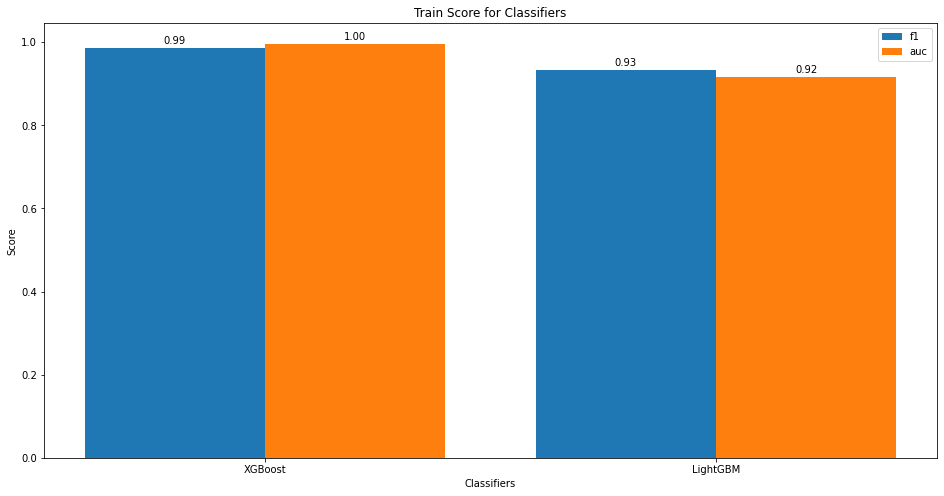

Testing GAUSSIANNB...
Testing DecisionTree...
Testing KNeighbors...
Testing LogisticReg...
Testing RandomForest...
Testing XGBoost...
 ###### Confusion Matrix #######
[[5427  275]
 [ 230   68]]
 ###############################
 executed in 0.0 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[5696    6]
 [ 293    5]]
 ###############################
 executed in 0.1 seconds.


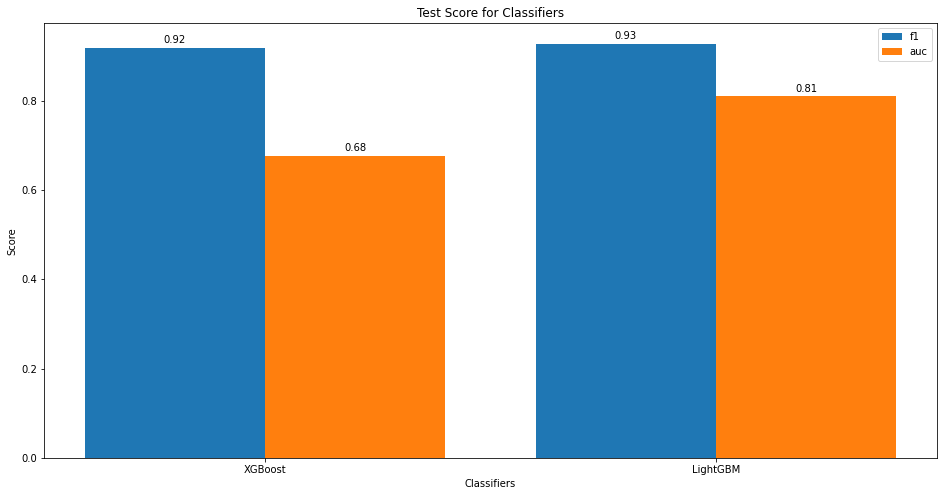

In [4]:

col     = "TARGET"
exclude = ["ID"]

# drop excluded columns and target column for X value
X = df_train.drop(exclude + [col], axis=1).values

# get target values
y = df_train[col].values

classifiers  = Classifiers(X, y, test_size=0.20, classifiers = CustomMLClassifiers.list(set_class_weight=True))

scores_train = classifiers.compare_train(cv=5)
score_test   = classifiers.compare_test()



In [5]:
classifiers.classifiers[-2].value.model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=19, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [6]:
# negative / positive samples for y_train
(classifiers.y_train.shape[0] - classifiers.y_train.sum()) / classifiers.y_train.sum()

19.1173512154233

In [7]:
# negative / positive for y_test
(classifiers.y_test.shape[0] - classifiers.y_test.sum()) / classifiers.y_test.sum()

19.13422818791946